# Exploratory Data Analysis (EDA)

This notebook provides a detailed exploratory data analysis of the RSNA Lumbar Degenerative Imaging Spine Classification dataset. The goal is to understand the structure of the imaging data, the distribution of the classification labels, and the relationships between them.



In [1]:
!pip install pydicom pandas matplotlib seaborn

## 1. Setup and Data Loading

In [2]:
import os

# Get the current working directory (optional, for verification)
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

new_directory_path = "C:/Users/sheepie/" 


# Change the working directory
os.chdir(new_directory_path)

# Verify the change (optional)
new_current_directory = os.getcwd()
print(f"New current working directory: {new_current_directory}")

Current working directory: c:\Users\sheepie\rsna-2024-lumbar-spine-degenerative-classification
New current working directory: C:\Users\sheepie


In [3]:

import os
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define file paths (adjust as needed)
DATA_PATH = "./rsna-2024-lumbar-spine-degenerative-classification/"
TRAIN_CSV = os.path.join(DATA_PATH, "train.csv")
TRAIN_LABELS_COORD_CSV = os.path.join(DATA_PATH, "train_label_coordinates.csv")
TRAIN_SERIES_DESC_CSV = os.path.join(DATA_PATH, "train_series_descriptions.csv")
IMAGE_PATH = os.path.join(DATA_PATH, "train_images/")

# Load the dataframes
try:
    train_df = pd.read_csv(TRAIN_CSV)
    labels_coord_df = pd.read_csv(TRAIN_LABELS_COORD_CSV)
    series_desc_df = pd.read_csv(TRAIN_SERIES_DESC_CSV)
    print("DataFrames loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check your file paths.")
    train_df, labels_coord_df, series_desc_df = None, None, None


DataFrames loaded successfully!


## 2. Initial Data Inspection
We'll start by looking at the basic structure and contents of our metadata files

In [4]:
if train_df is not None:
    print("--- train.csv ---")
    print(train_df.info())
    print("\nFirst 5 rows:")
    print(train_df.head())
    print(f"\nNumber of unique studies: {train_df['study_id'].nunique()}")

    print("\n--- train_label_coordinates.csv ---")
    print(labels_coord_df.info())
    print("\nFirst 5 rows:")
    print(labels_coord_df.head())

    print("\n--- train_series_descriptions.csv ---")
    print(series_desc_df.info())
    print("\nFirst 5 rows:")
    print(series_desc_df.head())
    print(f"\nUnique series descriptions: {series_desc_df['series_description'].unique()}")
    

--- train.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   study_id                                1975 non-null   int64 
 1   spinal_canal_stenosis_l1_l2             1974 non-null   object
 2   spinal_canal_stenosis_l2_l3             1974 non-null   object
 3   spinal_canal_stenosis_l3_l4             1974 non-null   object
 4   spinal_canal_stenosis_l4_l5             1974 non-null   object
 5   spinal_canal_stenosis_l5_s1             1974 non-null   object
 6   left_neural_foraminal_narrowing_l1_l2   1973 non-null   object
 7   left_neural_foraminal_narrowing_l2_l3   1973 non-null   object
 8   left_neural_foraminal_narrowing_l3_l4   1973 non-null   object
 9   left_neural_foraminal_narrowing_l4_l5   1973 non-null   object
 10  left_neural_foraminal_narrowing_l5_s1   1973 non-null 

### Data Cleaning and Preprocessing


In [5]:
# Identify categorical columns with a limited number of unique values
print("\nMemory usage before conversion:")
print(train_df.memory_usage(deep=True))
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        if train_df[col].nunique() < 50:  # Threshold can be adjusted
            train_df[col] = train_df[col].astype('category')
            print(f"Converted '{col}' to category type.")

print("\nMemory usage after conversion:")
print(train_df.memory_usage(deep=True))


Memory usage before conversion:
Index                                        132
study_id                                   15800
spinal_canal_stenosis_l1_l2               133958
spinal_canal_stenosis_l2_l3               133546
spinal_canal_stenosis_l3_l4               132964
spinal_canal_stenosis_l4_l5               132278
spinal_canal_stenosis_l5_s1               134016
left_neural_foraminal_narrowing_l1_l2     134029
left_neural_foraminal_narrowing_l2_l3     133660
left_neural_foraminal_narrowing_l3_l4     132795
left_neural_foraminal_narrowing_l4_l5     131641
left_neural_foraminal_narrowing_l5_s1     131638
right_neural_foraminal_narrowing_l1_l2    133758
right_neural_foraminal_narrowing_l2_l3    133478
right_neural_foraminal_narrowing_l3_l4    132565
right_neural_foraminal_narrowing_l4_l5    131475
right_neural_foraminal_narrowing_l5_s1    131574
left_subarticular_stenosis_l1_l2          127977
left_subarticular_stenosis_l2_l3          130168
left_subarticular_stenosis_l3_l4    

In [6]:
# Total rows
total_rows = len(train_df)

# Count missing values
missing_counts = train_df.isnull().sum()

# Compute percentages to decide whether to drop or impute
missing_percent = (missing_counts / total_rows) * 100

# Put into a DataFrame
missing_df = (
    pd.DataFrame({
        "Column": missing_counts.index,
        "Missing Values": missing_counts.values,
        "Missing %": missing_percent.values.round(2)
    })
    .sort_values("Missing Values", ascending=False)
    .reset_index(drop=True)
)

print(f"Total rows: {total_rows}")
print(missing_df)


Total rows: 1975
                                    Column  Missing Values  Missing %
0         left_subarticular_stenosis_l1_l2             164       8.30
1        right_subarticular_stenosis_l1_l2             161       8.15
2         left_subarticular_stenosis_l2_l3              82       4.15
3        right_subarticular_stenosis_l2_l3              82       4.15
4         left_subarticular_stenosis_l5_s1              11       0.56
5   right_neural_foraminal_narrowing_l5_s1               8       0.41
6   right_neural_foraminal_narrowing_l2_l3               8       0.41
7   right_neural_foraminal_narrowing_l1_l2               8       0.41
8   right_neural_foraminal_narrowing_l4_l5               8       0.41
9   right_neural_foraminal_narrowing_l3_l4               8       0.41
10       right_subarticular_stenosis_l5_s1               7       0.35
11        left_subarticular_stenosis_l3_l4               3       0.15
12        left_subarticular_stenosis_l4_l5               3       0.15
13 

### Mode Imputation

In [7]:
# Impute missing values with the mode for all categorical columns
categorical_cols_with_na = train_df.select_dtypes(include='category').columns[train_df.select_dtypes(include='category').isna().any()]
for col in categorical_cols_with_na:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)

print("Missing values after imputation:")
print(train_df.isnull().sum())

# CHECKPOINT: Save the cleaned and preprocessed DataFrame to a new CSV file

train_df.to_csv('train_cleaned.csv', index=False)
print("\nCleaned DataFrame saved to 'train_cleaned.csv'.")


Missing values after imputation:
study_id                                  0
spinal_canal_stenosis_l1_l2               0
spinal_canal_stenosis_l2_l3               0
spinal_canal_stenosis_l3_l4               0
spinal_canal_stenosis_l4_l5               0
spinal_canal_stenosis_l5_s1               0
left_neural_foraminal_narrowing_l1_l2     0
left_neural_foraminal_narrowing_l2_l3     0
left_neural_foraminal_narrowing_l3_l4     0
left_neural_foraminal_narrowing_l4_l5     0
left_neural_foraminal_narrowing_l5_s1     0
right_neural_foraminal_narrowing_l1_l2    0
right_neural_foraminal_narrowing_l2_l3    0
right_neural_foraminal_narrowing_l3_l4    0
right_neural_foraminal_narrowing_l4_l5    0
right_neural_foraminal_narrowing_l5_s1    0
left_subarticular_stenosis_l1_l2          0
left_subarticular_stenosis_l2_l3          0
left_subarticular_stenosis_l3_l4          0
left_subarticular_stenosis_l4_l5          0
left_subarticular_stenosis_l5_s1          0
right_subarticular_stenosis_l1_l2         0

C:\Users\sheepie\AppData\Local\Temp\ipykernel_11764\1604708510.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(mode_val, inplace=True)


## 3. Label Distribution Analysis
This is a critical step to understand the class balance. The competition focuses on five conditions and three severity grades. A significant imbalance can impact model training.


Distribution of severity grades across all conditions and levels:
                                        Normal/Mild  Moderate  Severe
spinal_canal_stenosis_l1_l2                      67      1887      21
spinal_canal_stenosis_l2_l3                     151      1771      53
spinal_canal_stenosis_l3_l4                     230      1623     122
spinal_canal_stenosis_l4_l5                     237      1483     255
spinal_canal_stenosis_l5_s1                      51      1905      19
left_neural_foraminal_narrowing_l1_l2            63      1910       2
left_neural_foraminal_narrowing_l2_l3           171      1793      11
left_neural_foraminal_narrowing_l3_l4           411      1524      40
left_neural_foraminal_narrowing_l4_l5           629      1206     140
left_neural_foraminal_narrowing_l5_s1           520      1249     206
right_neural_foraminal_narrowing_l1_l2           63      1899      13
right_neural_foraminal_narrowing_l2_l3          168      1801       6
right_neural_foraminal_

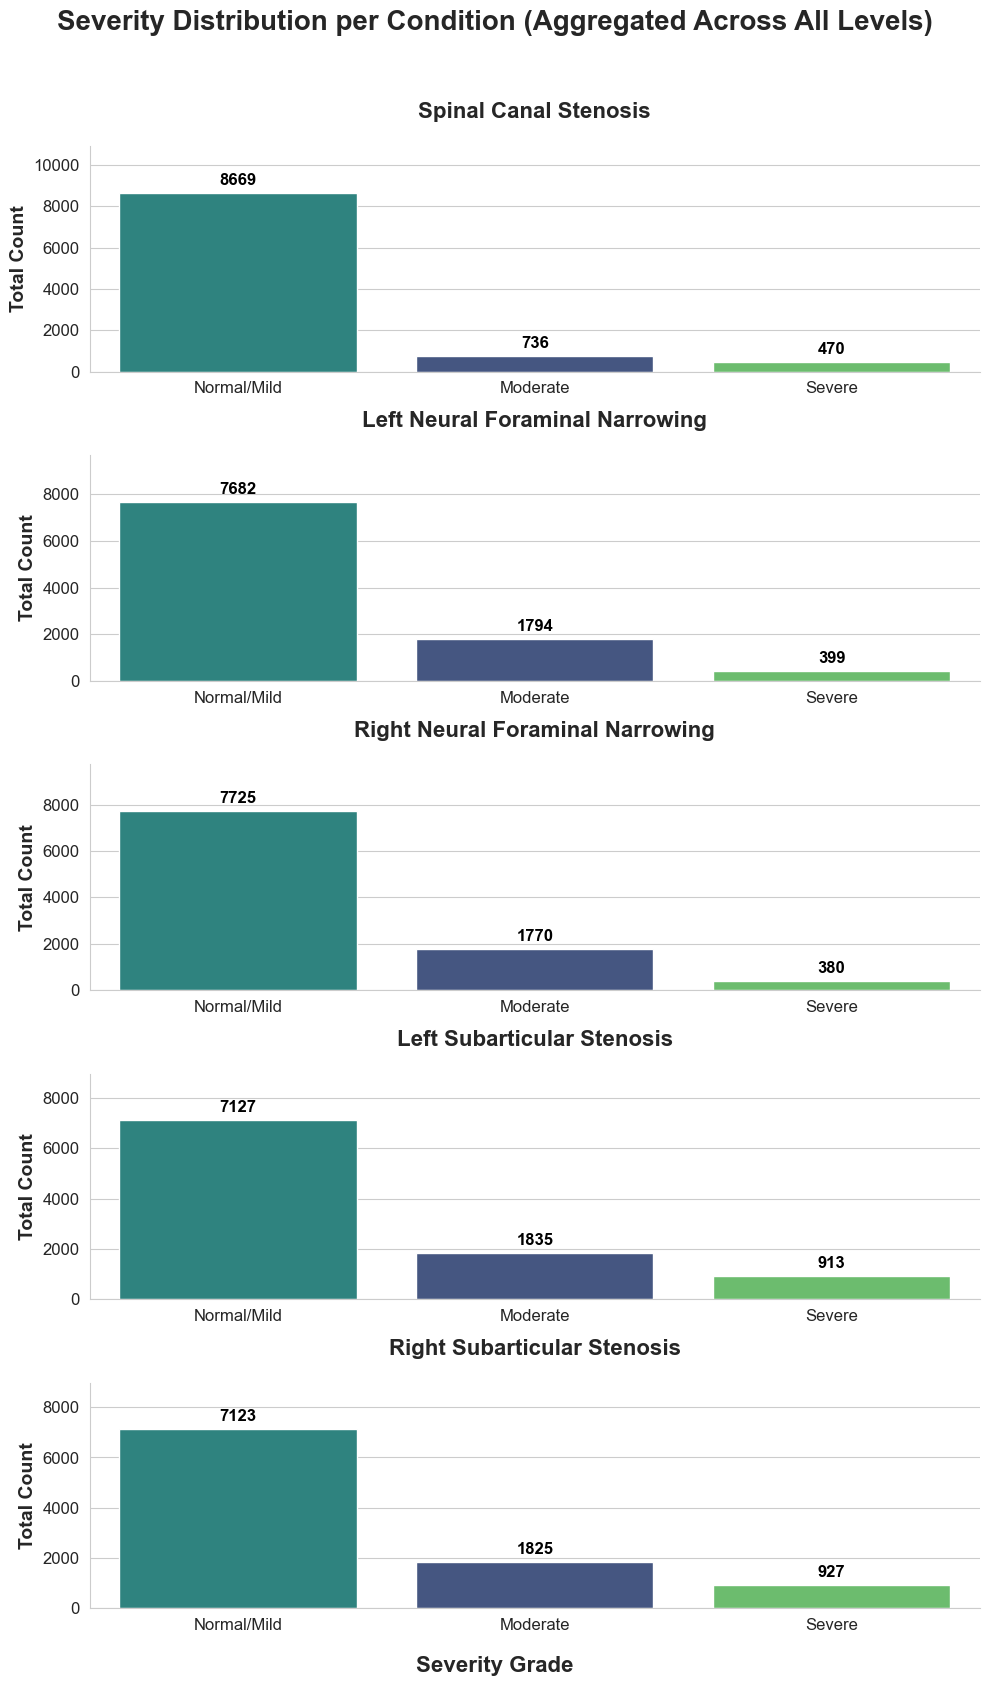


As shown in the plots, there is a significant class imbalance with Normal/Mild cases dominating the dataset.


In [8]:
if train_df is not None:
    # Conditions to analyze
    conditions = [
        "spinal_canal_stenosis",
        "left_neural_foraminal_narrowing",
        "right_neural_foraminal_narrowing",
        "left_subarticular_stenosis",
        "right_subarticular_stenosis",
    ]

    # Vertebra levels
    levels = ["l1_l2", "l2_l3", "l3_l4", "l4_l5", "l5_s1"] 

    # Let's pivot the data to see the counts of each severity for each condition-level pair
    severity_counts = {}
    for condition in conditions:
        for level in levels:
            col_name = f"{condition}_{level}"
            if col_name in train_df.columns:
                counts = train_df[col_name].value_counts().sort_index()
                severity_counts[col_name] = counts

    severity_df = pd.DataFrame(severity_counts).T
    if not severity_df.empty:
        severity_df.columns = ["Normal/Mild", "Moderate", "Severe"]
        print("\nDistribution of severity grades across all conditions and levels:")
        print(severity_df)

        # Set a more vibrant and professional plot style
        sns.set_style("whitegrid")
        sns.set_palette("viridis") # Use a perceptually uniform colormap

        # Visualize the distributions
        fig, axes = plt.subplots(5, 1, figsize=(10,18))
        fig.suptitle('Severity Distribution per Condition (Aggregated Across All Levels)', y=0.98, fontsize=20, weight='bold')

        for i, condition in enumerate(conditions):
            ax = axes[i]
            # Aggregate data for the current condition across all levels
            condition_cols = [f"{condition}_{level}" for level in levels if f"{condition}_{level}" in train_df.columns]
            condition_df = train_df[condition_cols].stack().reset_index(drop=True)
            
            # Create the count plot with a clear order
            sns.countplot(
            x=condition_df, 
            ax=ax, 
            order=["Normal/Mild", "Moderate", "Severe"], 
            palette="viridis",
            hue=condition_df, # Use hue to ensure consistent color mapping if a category is missing
            legend=False
            )

            # Add count labels on top of each bar for clarity
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points',
                        fontsize=12,
                        color='black',
                        weight='semibold')

            # --- Aesthetics and Readability ---
            ax.set_title(f'{condition.replace("_", " ").title()}', fontsize=16, weight='bold', pad=20)
            ax.set_xlabel('')  # Remove individual x-labels, a common one will be added
            ax.set_ylabel('Total Count', fontsize=14, weight='semibold')
            ax.tick_params(axis='x', labelsize=12)
            ax.tick_params(axis='y', labelsize=12)
            
            # Give more space for the annotations at the top
            ax.set_ylim(top=ax.get_ylim()[1] * 1.2)
            
            # Remove top and right spines for a cleaner look
            sns.despine(ax=ax)

        # Add a common x-label for the entire figure
        fig.text(0.5, 0.06, 'Severity Grade', ha='center', va='center', fontsize=16, weight='bold')
        
        # Adjust layout to prevent titles and labels from overlapping
        plt.tight_layout(rect=[0, 0.07, 1, 0.96])
        plt.show()

        print("\nAs shown in the plots, there is a significant class imbalance with Normal/Mild cases dominating the dataset.")
    else:
        print("\nNo severity columns found. Please ensure 'train.csv' has columns named in the format 'condition_level'.")



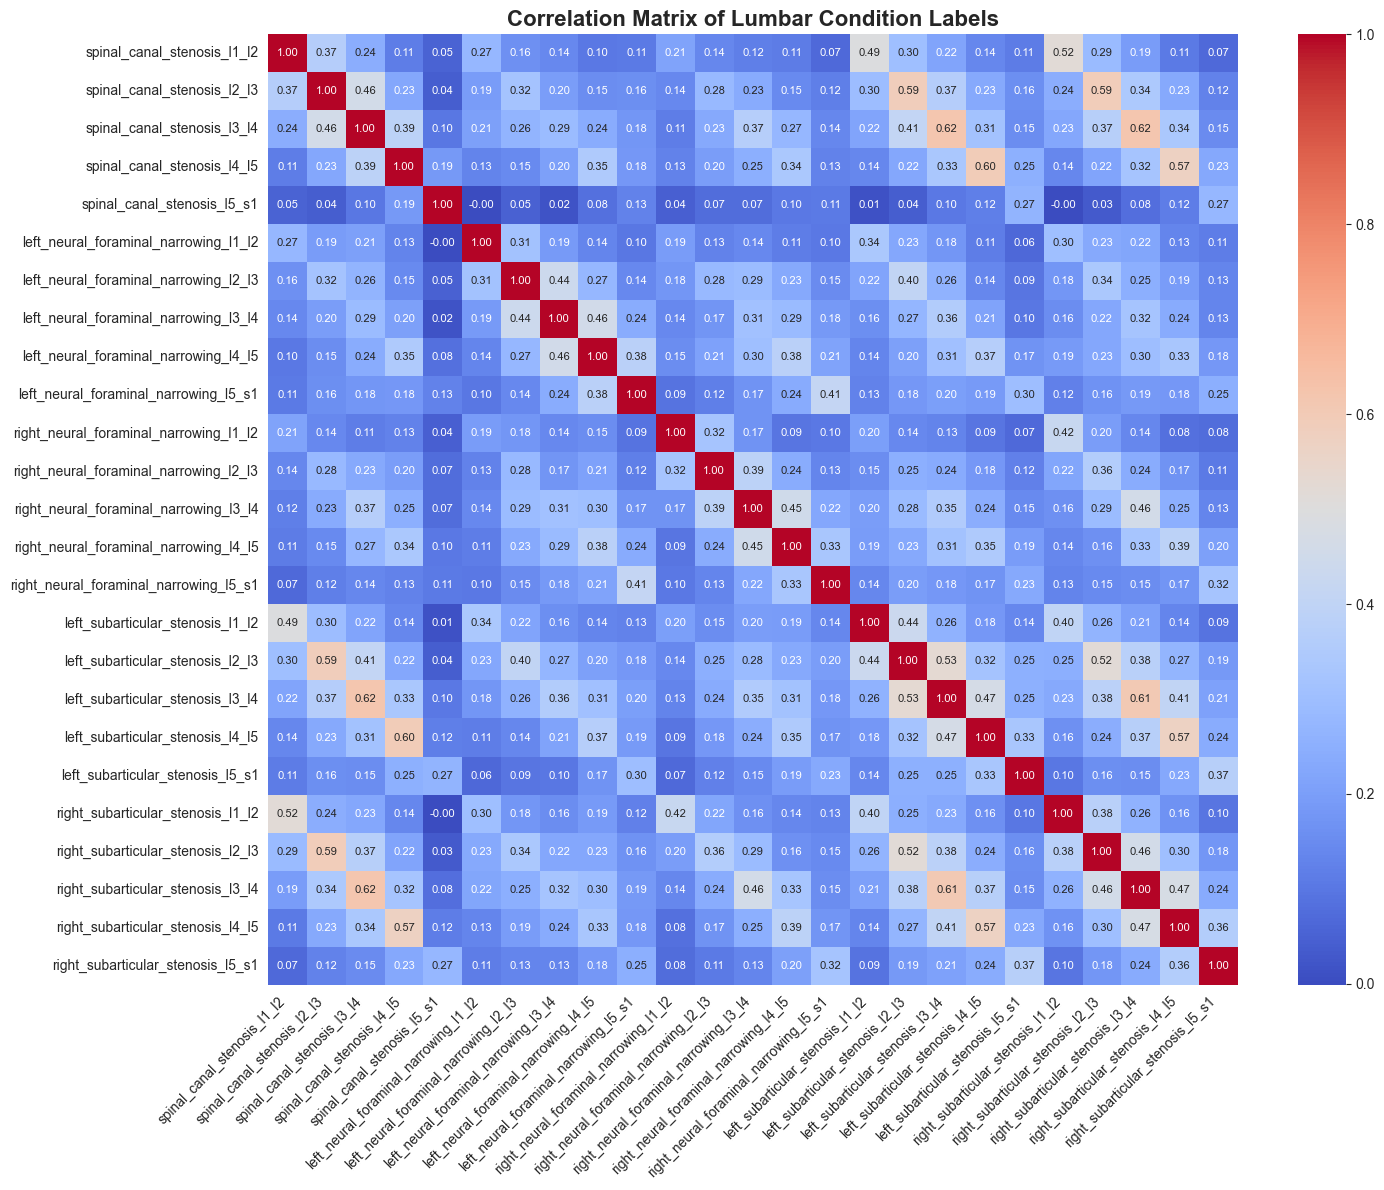


Encoded labels saved to 'train_labels_encoded.csv'.


In [9]:
from sklearn.preprocessing import LabelEncoder

# Select all columns with the word 'stenosis' or 'narrowing'
label_cols = [col for col in train_df.columns if 'stenosis' in col or 'narrowing' in col]

# Create a copy and encode the categorical labels to numerical values for correlation
encoded_df = train_df[label_cols].copy()

# Define the desired order for the labels
label_order = ['Normal/Mild', 'Moderate', 'Severe']

# Apply the encoding to each column
for col in label_cols:
    # Convert column to category with the specified order
    cat_type = pd.CategoricalDtype(categories=label_order, ordered=True)
    encoded_df[col] = encoded_df[col].astype(cat_type)
    # Use the category codes for numerical representation
    encoded_df[col] = encoded_df[col].cat.codes

plt.figure(figsize=(15, 12))
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Lumbar Condition Labels', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# CHECKPOINT: Save the encoded labels to a new CSV file
encoded_df.to_csv('train_labels_encoded.csv', index=False)
print("\nEncoded labels saved to 'train_labels_encoded.csv'.")

### 4. Visualizing a Sample DICOM Image
To understand the actual image data, we'll pick a sample DICOM file and visualize one of its slices.

In [11]:
def plot_image_with_coords(study_id, series_id, labels_coord_df, series_desc_df):
    """
    Plots a sample image with its corresponding labels and coordinates.
    """
    # Get series description
    desc = series_desc_df[(series_desc_df['study_id'] == study_id) & 
                          (series_desc_df['series_id'] == series_id)]['series_description'].iloc[0]
    
    # Get coordinates for the selected study
    study_coords = labels_coord_df[labels_coord_df['study_id'] == study_id]
    
    # Build path to DICOM files
    study_path = os.path.join('../data', 'train_images', str(study_id))
    series_path = os.path.join(study_path, str(series_id))
    
    dcm_files = [f for f in os.listdir(series_path) if f.endswith(".dcm")]
    if not dcm_files:
        print(f"No DICOM files found in series path: {series_path}")
        return
        
    dcm_path = os.path.join(series_path, dcm_files[len(dcm_files) // 2]) # Get middle image
    ds = pydicom.dcmread(dcm_path)
    img_array = ds.pixel_array
    
    plt.figure(figsize=(7,7))
    plt.imshow(img_array, cmap=plt.cm.gray)
    plt.title(f"Sample Image with Labeled Coordinates\nStudy ID: {study_id}, Series ID: {series_id}\n{desc}")
    
    # Ensure coordinates are in the correct format for plotting
    study_coords = labels_coord_df[(labels_coord_df['study_id'] == study_id) & (labels_coord_df['series_id'] == series_id)]
    plt.scatter(study_coords['x'], study_coords['y'], c='red', s=50, marker='x', label='Labeled Coordinates')
    plt.legend()
    plt.show()



In [12]:
# Function to get the path to a sample image
def get_sample_image_path(base_path):
    for study_id in os.listdir(base_path):
        study_path = os.path.join(base_path, study_id)
        if os.path.isdir(study_path):
            for series_id in os.listdir(study_path):
                series_path = os.path.join(study_path, series_id)
                if os.path.isdir(series_path):
                    for file_name in os.listdir(series_path):
                        if file_name.endswith(".dcm"):
                            return os.path.join(series_path, file_name)
    return None



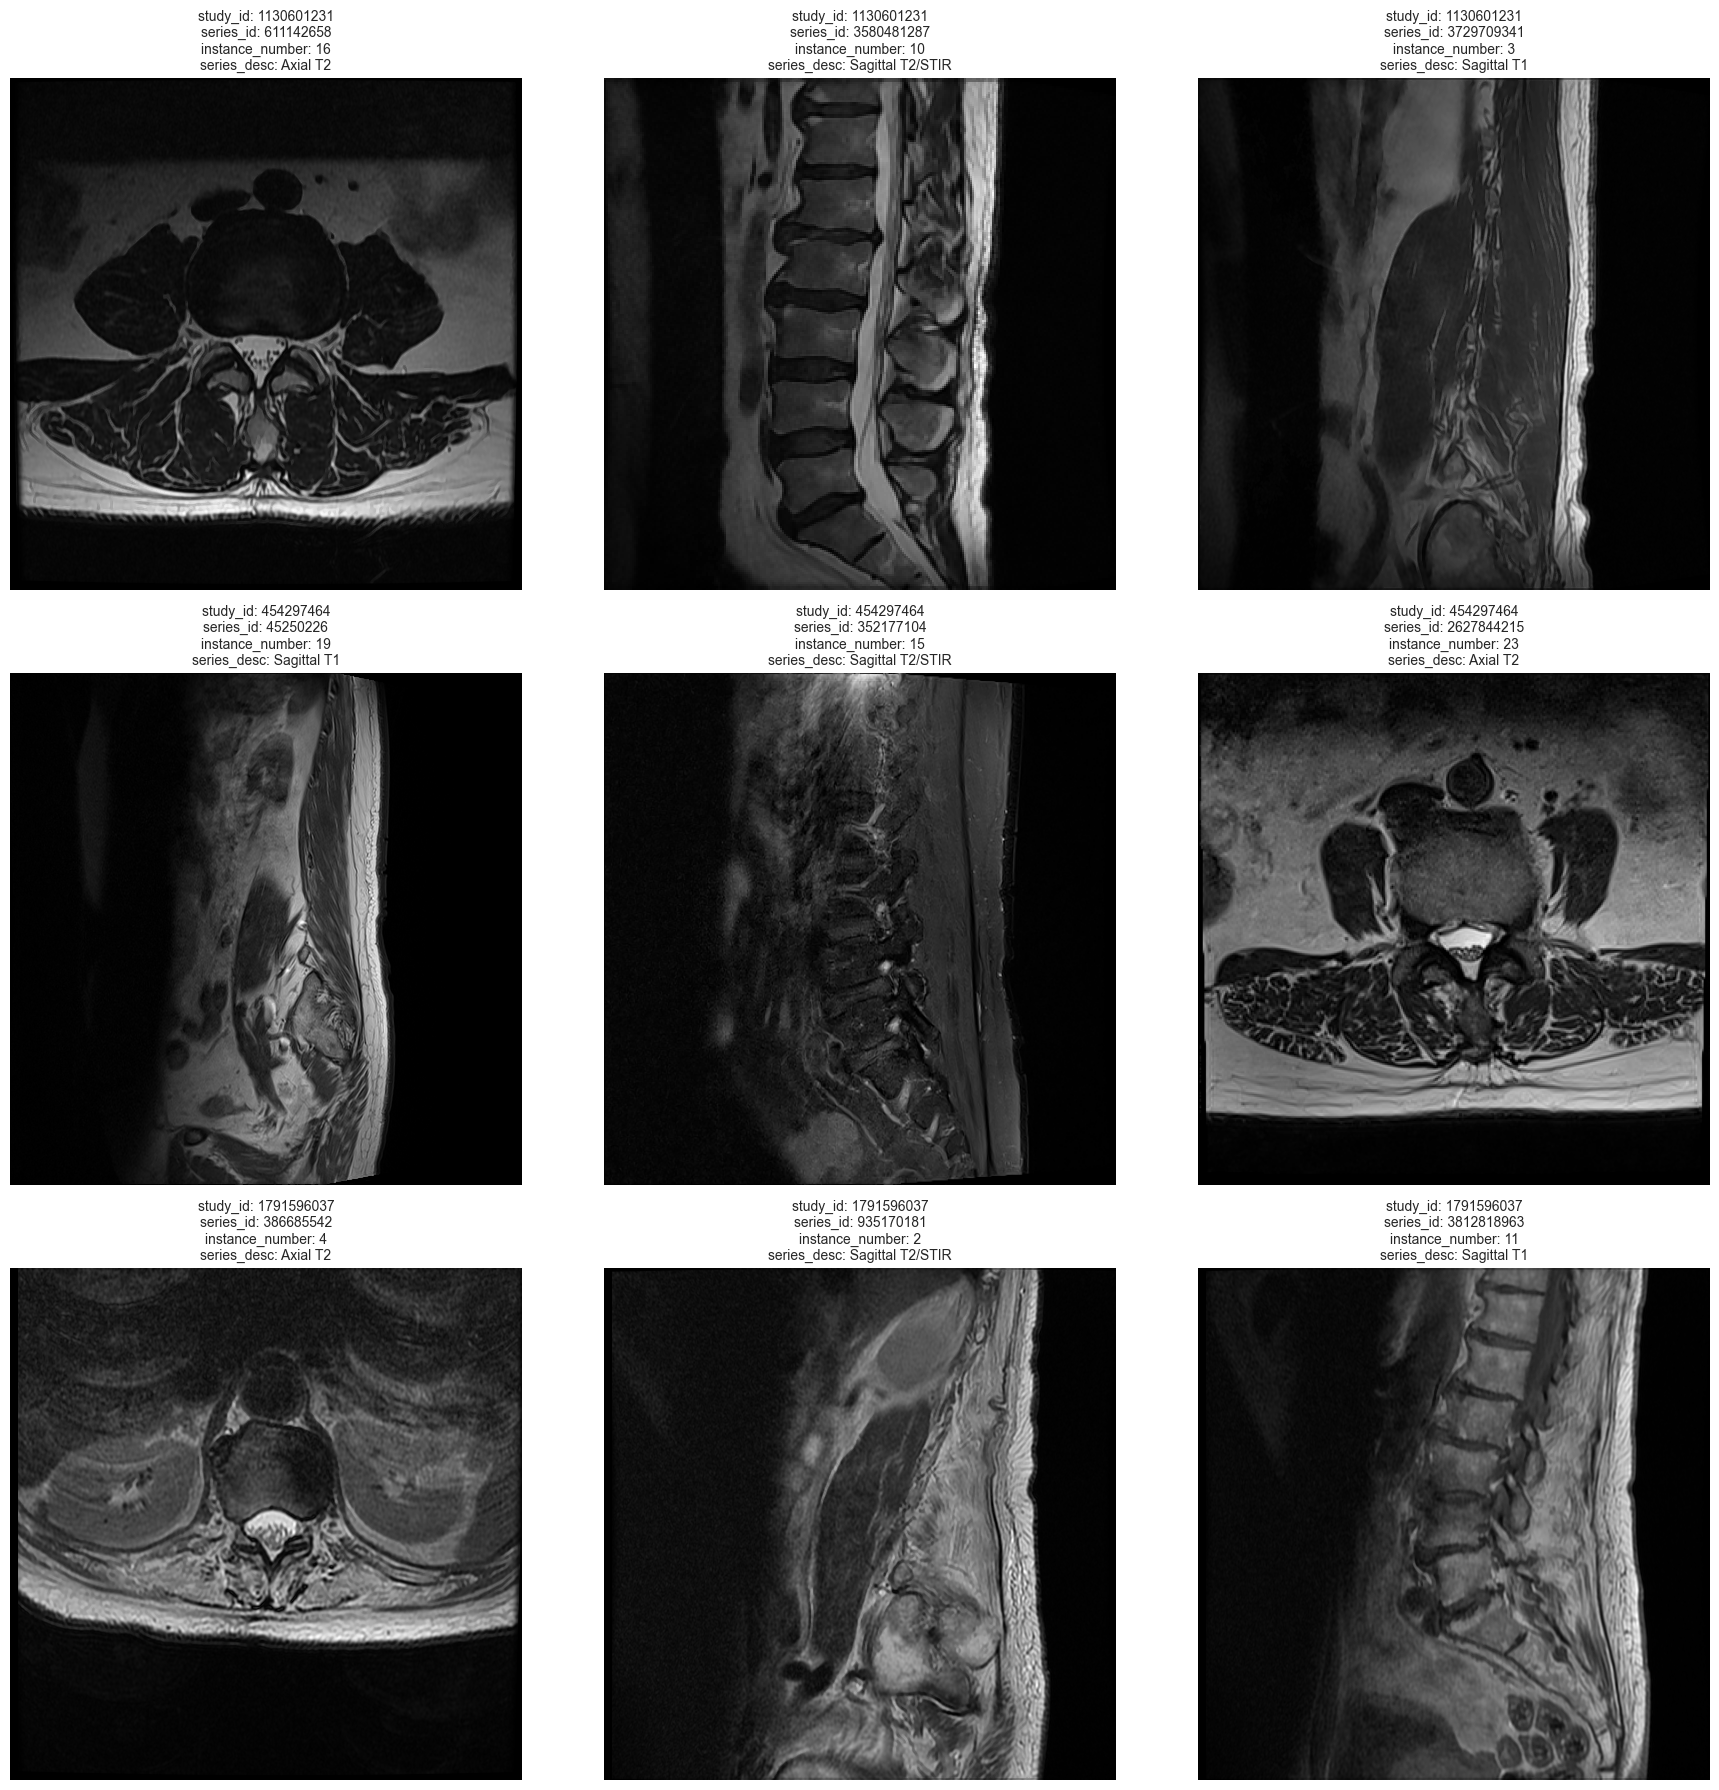

In [13]:
if train_df is not None and series_desc_df is not None and labels_coord_df is not None:
    num_images = 3  # Number of random studies (people)
    studies = np.random.choice(os.listdir(IMAGE_PATH), num_images, replace=False)
    sample_info = []

    for study_id in studies:
        study_path = os.path.join(IMAGE_PATH, study_id)
        if os.path.isdir(study_path):
            descs = series_desc_df[series_desc_df['study_id'] == int(study_id)]
            unique_descs = descs['series_description'].unique()
            for desc in unique_descs:
                series_row = descs[descs['series_description'] == desc].iloc[0]
                series_id = str(series_row['series_id'])
                series_path = os.path.join(study_path, series_id)
                if os.path.isdir(series_path):
                    dcm_files = [f for f in os.listdir(series_path) if f.endswith(".dcm")]
                    if dcm_files:
                        dcm_file = np.random.choice(dcm_files)
                        dcm_path = os.path.join(series_path, dcm_file)
                        ds = pydicom.dcmread(dcm_path)
                        instance_number = getattr(ds, "InstanceNumber", None)
                        sample_info.append({
                            "study_id": study_id,
                            "series_id": series_id,
                            "instance_number": instance_number,
                            "series_description": desc,
                            "dcm_path": dcm_path,
                            "img_array": ds.pixel_array
                        })

    if sample_info:
        fig, axes = plt.subplots(num_images, 3, figsize=(18, 6 * num_images))
        for i, study_id in enumerate(studies):
            study_samples = [info for info in sample_info if info["study_id"] == study_id]
            for j, info in enumerate(study_samples):
                ax = axes[i, j] if num_images > 1 else axes[j]
                ax.imshow(info["img_array"], cmap=plt.cm.gray)
                ax.set_title(
                    f"study_id: {info['study_id']}\n"
                    f"series_id: {info['series_id']}\n"
                    f"instance_number: {info['instance_number']}\n"
                    f"series_desc: {info['series_description']}",
                    fontsize=10
                )
                ax.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("\nCould not find sample DICOM images. Check the data directory.")


### 5. Metadata and Image Relationship
This step connects the tabular metadata to the image data itself


Coordinates for Study ID: 4003253 and Series ID: 2448190387 (Axial T2)
    study_id   series_id  instance_number                    condition  level  \
15   4003253  2448190387                3   Left Subarticular Stenosis  L1/L2   
16   4003253  2448190387                4  Right Subarticular Stenosis  L1/L2   
17   4003253  2448190387               11   Left Subarticular Stenosis  L2/L3   
18   4003253  2448190387               11  Right Subarticular Stenosis  L2/L3   
19   4003253  2448190387               19   Left Subarticular Stenosis  L3/L4   
20   4003253  2448190387               19  Right Subarticular Stenosis  L3/L4   
21   4003253  2448190387               28   Left Subarticular Stenosis  L4/L5   
22   4003253  2448190387               28  Right Subarticular Stenosis  L4/L5   
23   4003253  2448190387               35   Left Subarticular Stenosis  L5/S1   
24   4003253  2448190387               35  Right Subarticular Stenosis  L5/S1   

             x           y  
15  179

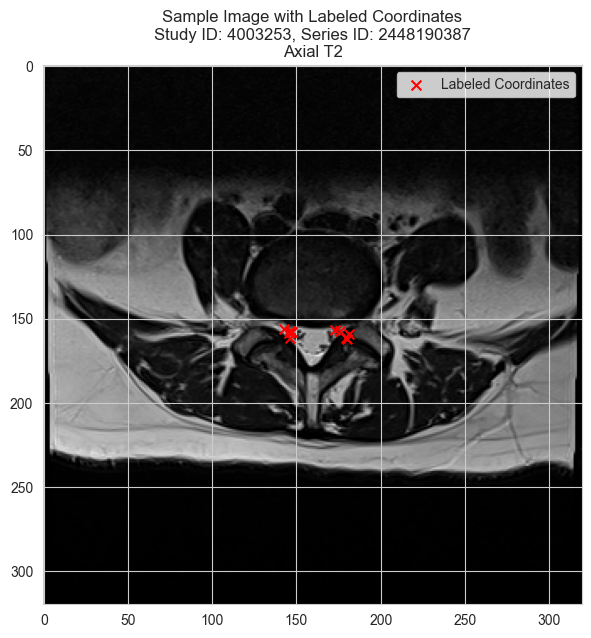


Coordinates for Study ID: 4003253 and Series ID: 1054713880 (Sagittal T1)
    study_id   series_id  instance_number                         condition  \
5    4003253  1054713880                4  Right Neural Foraminal Narrowing   
6    4003253  1054713880                4  Right Neural Foraminal Narrowing   
7    4003253  1054713880                5  Right Neural Foraminal Narrowing   
8    4003253  1054713880                6  Right Neural Foraminal Narrowing   
9    4003253  1054713880                6  Right Neural Foraminal Narrowing   
10   4003253  1054713880               11   Left Neural Foraminal Narrowing   
11   4003253  1054713880               11   Left Neural Foraminal Narrowing   
12   4003253  1054713880               11   Left Neural Foraminal Narrowing   
13   4003253  1054713880               12   Left Neural Foraminal Narrowing   
14   4003253  1054713880               12   Left Neural Foraminal Narrowing   

    level           x           y  
5   L4/L5  187.9617

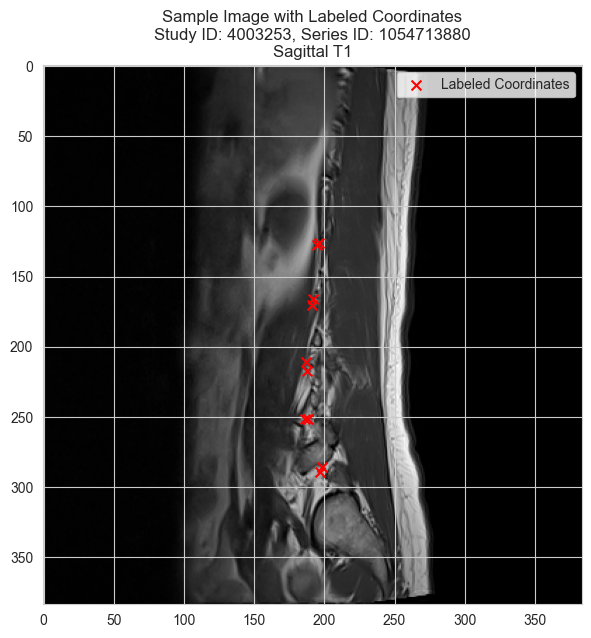


Coordinates for Study ID: 4003253 and Series ID: 702807833 (Sagittal T2/STIR)
   study_id  series_id  instance_number              condition  level  \
0   4003253  702807833                8  Spinal Canal Stenosis  L1/L2   
1   4003253  702807833                8  Spinal Canal Stenosis  L2/L3   
2   4003253  702807833                8  Spinal Canal Stenosis  L3/L4   
3   4003253  702807833                8  Spinal Canal Stenosis  L4/L5   
4   4003253  702807833                8  Spinal Canal Stenosis  L5/S1   

            x           y  
0  322.831858  227.964602  
1  320.571429  295.714286  
2  323.030303  371.818182  
3  335.292035  427.327434  
4  353.415929  483.964602  


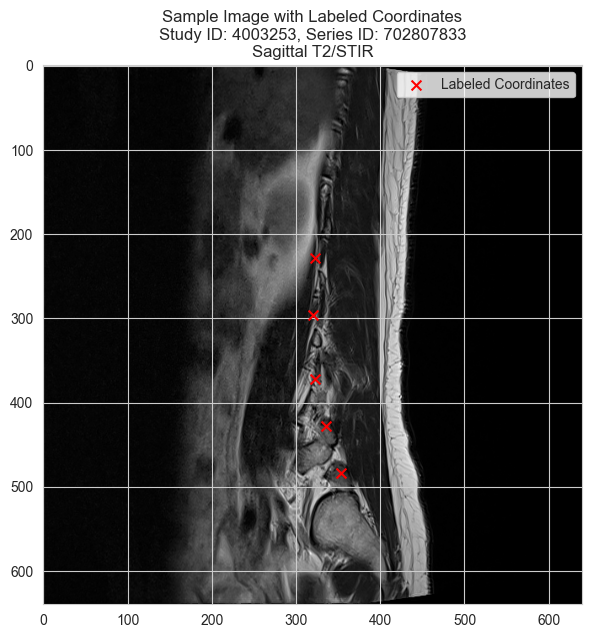

In [14]:
if train_df is not None and labels_coord_df is not None and series_desc_df is not None:
    # Plot coordinates for Axial T2, Sagittal T1, and Sagittal T2/STIR for the sample study
    sample_study = labels_coord_df['study_id'].iloc[0]

    # Series descriptions to plot
    plot_series = ['Axial T2', 'Sagittal T1', 'Sagittal T2/STIR']

    for desc in plot_series:
        series_rows = series_desc_df[
            (series_desc_df['study_id'] == sample_study) &
            (series_desc_df['series_description'] == desc)
        ]
        if series_rows.empty:
            print(f"No series found for {desc} in study {sample_study}")
            continue

        for _, row in series_rows.iterrows():
            sample_series = row['series_id']
            study_coords = labels_coord_df[
                (labels_coord_df['study_id'] == sample_study) &
                (labels_coord_df['series_id'] == sample_series)
            ]
            print(f"\nCoordinates for Study ID: {sample_study} and Series ID: {sample_series} ({desc})")
            print(study_coords)

            # Read a sample image from this series (middle slice)
            series_path = os.path.join(IMAGE_PATH, str(sample_study), str(sample_series))
            dcm_files = [f for f in os.listdir(series_path) if f.endswith(".dcm")]
            if not dcm_files:
                print(f"No DICOM files found in series path: {series_path}")
                continue
            dcm_path = os.path.join(series_path, dcm_files[len(dcm_files) // 2])
            ds = pydicom.dcmread(dcm_path)
            img_array = ds.pixel_array

            plt.figure(figsize=(7,7))
            plt.imshow(img_array, cmap=plt.cm.gray)
            plt.title(f"Sample Image with Labeled Coordinates\nStudy ID: {sample_study}, Series ID: {sample_series}\n{desc}")

            plt.scatter(study_coords['x'], study_coords['y'], c='red', s=50, marker='x', label='Labeled Coordinates')
            plt.legend()
            plt.show()
